<div style="text-align: right"> 
Universidad Nacional de Colombia <br>
Maestría en Ciencias - Estadística <br>
Big Data - Métodos Intensivos de Computación Estadística -2023829 <br>
Semestre 2021-1 
</div> 

<div style="text-align: right"> 
Estudiante: Diego Clemente Rojas Chingate   <br>
</div> 


# Dataset European Centre for Medium Range Weather Forecastsm

Datos meterológicos globales de la organización ECMWF.[Fuente](https://github.com/dask/dask-tutorial/blob/main/Homework.ipynb)

Realizar lo siguiente:

1. [¿Cuál es la varianza de la temperatura en el tiempo?](#1.-¿Cuál-es-la-varianza-de-la-temperatura-en-el-tiempo?)

2. [Graficar la temperatura de la Tierra como una función de latitud y luego de longitud](#3.-Graficar-la-temperatura-de-la-Tierra-como-una-función-de-latitud-y-luego-de-longitud)

In [1]:
import xarray as xr

ds = xr.open_dataset('data/2014-12-21.nc3', engine='netcdf4').to_dask_dataframe()

### Información general

In [7]:
ds

,latitude,longitude,time,u10,v10,t2m
npartitions=1,,,,,,
0,float32,float32,datetime64[ns],float32,float32,float32
4152959,...,...,...,...,...,...


In [3]:
ds.head()

,latitude,longitude,time,u10,v10,t2m
0,90.0,0.00,2014-12-21 00:00:00,0.976245,6.688704,253.658356
1,90.0,0.00,2014-12-21 06:00:00,2.017778,6.926730,252.824692
2,90.0,0.00,2014-12-21 12:00:00,1.463805,6.638262,251.406418
3,90.0,0.00,2014-12-21 18:00:00,1.919780,6.683187,250.316132
4,90.0,0.25,2014-12-21 00:00:00,0.976245,6.688704,253.658356


In [8]:
ds.info

<bound method DataFrame.info of Dask DataFrame Structure:
              latitude longitude            time      u10      v10      t2m
npartitions=1                                                              
0              float32   float32  datetime64[ns]  float32  float32  float32
4152959            ...       ...             ...      ...      ...      ...
Dask Name: concat-indexed, 31 tasks>

In [4]:
ds.describe().compute()

,latitude,longitude,u10,v10,t2m
count,4.152960e+06,4.152960e+06,4.152960e+06,4.152960e+06,4.152960e+06
mean,0.000000e+00,1.798750e+02,-7.582437e-02,-1.711846e-01,2.779218e+02
std,5.203363e+01,1.039231e+02,5.713509e+00,4.519132e+00,1.913574e+01
min,-9.000000e+01,0.000000e+00,-2.665273e+01,-2.692729e+01,2.158189e+02
25%,-4.500000e+01,8.993750e+01,-4.057291e+00,-3.079016e+00,2.635650e+02
50%,0.000000e+00,1.798750e+02,-3.220268e-01,-2.518706e-01,2.801941e+02
75%,4.500000e+01,2.698125e+02,3.445634e+00,2.892117e+00,2.955901e+02
max,9.000000e+01,3.597500e+02,2.642253e+01,2.472348e+01,3.153306e+02


# 1. ¿Cuál es la varianza de la temperatura en el tiempo?

In [5]:
print("La media de la temperatura es '" + str(ds["t2m"].mean().compute()) + " K' y la varianza es de '" + str(ds["t2m"].var().compute()) + "' K^2")

La media de la temperatura es '277.92183695484664 K' y la varianza es de '366.17673' K^2


# 2. Gráficar la temperatura de la Tierra como una función de latitud y luego de longitud

## Gráfica en función de la latitud

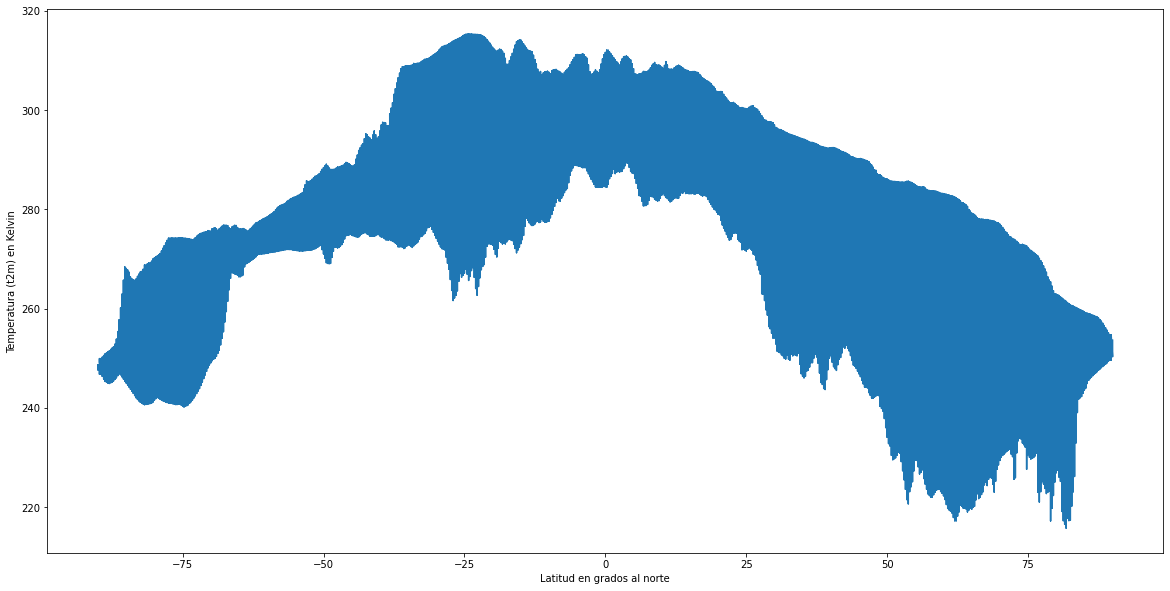

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(list(ds["latitude"].compute()), list(ds["t2m"].compute()))
plt.xlabel('Latitud en grados al norte')
plt.ylabel('Temperatura (t2m) en Kelvin')
plt.show()

## Gráfica en función de la longitud

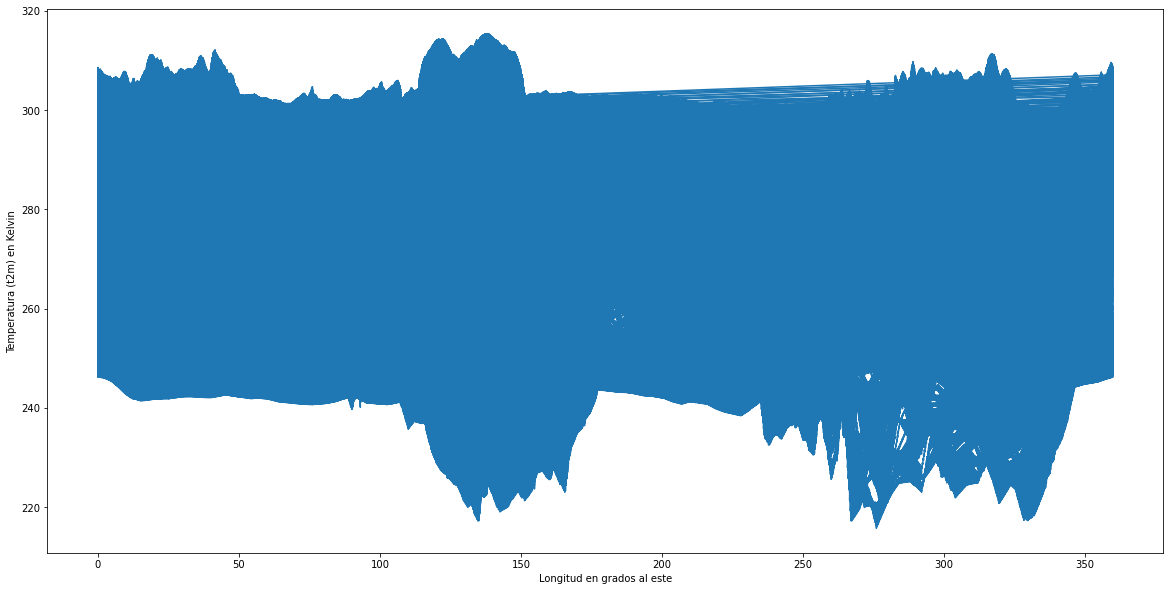

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

plt.figure(figsize=(20,10))
plt.plot(list(ds["longitude"].compute()), list(ds["t2m"].compute()))
plt.xlabel('Longitud en grados al este')
plt.ylabel('Temperatura (t2m) en Kelvin')
plt.show()